# Data Science Fundamentals 5

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Science IT Support, University Of Bern, 2020

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 4.

In [ ]:
from matplotlib import  pyplot as plt
import numpy as np
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

# 1. Classification of the F-MNIST dataset with neural network

## 0. Load data

We will create a model for classification of the F-MNIST dataset that we go acquainted with in previous sessions. We will normalize the inputs to have values $\in[0,1]$:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255
x_test = x_test/255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


## 1. Building a neural network

In [ ]:
print(x_train[0].shape)

(28, 28)


The size of each image sample $-\; 28\times28\text{ pixels}\;-\;$ defines the input size for our neural network. Network's output - probabilities of belonging to each of the 10 classes.

The following creates a 'model'. It is an object containing the ML model itself - a simple 3-layer fully connected neural network, optimization parameters, as well as the interface for model training.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model summary provides information about the model's layers and trainable parameters

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## 2. Model training

The `fit` function is the interface for model training. 
Here one can specify training and validation datasets, minibatch size, and the number of training epochs.

Here during training we also save the trained models checkpoints after each epoch of training.

In [ ]:
save_path = 'save/mnist_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

hist = model.fit(x=x_train, y=y_train,
                 epochs=50, batch_size=128, 
                 validation_data=(x_test, y_test),
                 callbacks=[save_callback])

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.7509 - accuracy: 0.7534 - val_loss: 0.5770 - val_accuracy: 0.8064
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5161 - accuracy: 0.8283 - val_loss: 0.5155 - val_accuracy: 0.8245
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4758 - accuracy: 0.8393 - val_loss: 0.4922 - val_accuracy: 0.8305
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4515 - accuracy: 0.8484 - val_loss: 0.4780 - val_accuracy: 0.8364
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4378 - accuracy: 0.8512 - val_loss: 0.4704 - val_accuracy: 0.8375
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4279 - accuracy: 0.8539 - val_loss: 0.4603 - val_accuracy: 0.8400
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8559 - val_loss: 0.4580 - val_accuracy: 0.8394
Epoch 

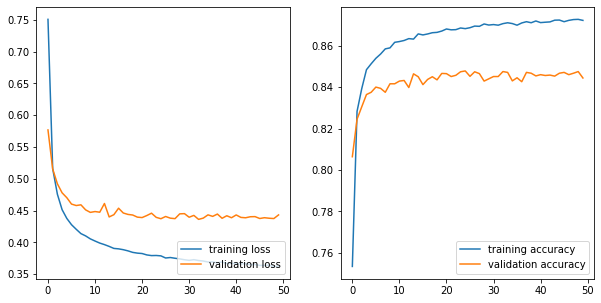

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

Current model performance can be evaluated on a dataset:

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.4433 - accuracy: 0.8444


[0.4432746469974518, 0.8443999886512756]

We can test trained model on an image:

true lablel:  9 ; predicted:  9 (Ankle boot)


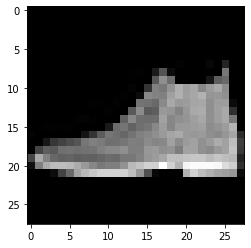

In [ ]:
im_id = 0
y_pred = model(x_test)

y_pred_most_probable = np.argmax(y_pred[im_id])
print('true lablel: ', y_test[im_id],
      '; predicted: ',  y_pred_most_probable,
      f'({class_names[y_pred_most_probable]})')
plt.imshow(x_test[im_id], cmap='gray');

As well as inspect on which samples does the model fail:

true lablel:  7 (Sneaker) ; predicted:  5 (Sandal)


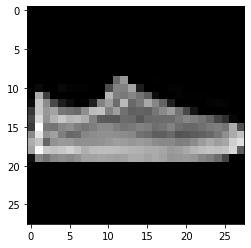

In [ ]:
y_pred_most_probable_all = np.argmax(y_pred, axis=1)
wrong_pred_map = y_pred_most_probable_all!=y_test
wrong_pred_idx = np.arange(len(wrong_pred_map))[wrong_pred_map]

im_id = wrong_pred_idx[0]

y_pred_most_probable = y_pred_most_probable_all[im_id]
print('true lablel: ', y_test[im_id],
      f'({class_names[y_test[im_id]]})',
      '; predicted: ',  y_pred_most_probable,
      f'({class_names[y_pred_most_probable]})')
plt.imshow(x_test[im_id], cmap='gray');

## 3. Loading trained model

In [ ]:
model.load_weights('save/mnist_1.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

model.load_weights('save/mnist_12.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

model.load_weights('save/mnist_18.ckpt')
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.5770 - accuracy: 0.8064
313/313 - 1s - loss: 0.4475 - accuracy: 0.8432
313/313 - 1s - loss: 0.4440 - accuracy: 0.8450


[0.4440324306488037, 0.8450000286102295]

## 4. Inspecting trained variables

We can obtain the trained variables from model layers:

In [ ]:
l = model.get_layer(index=1)
w, b = l.weights

w = w.numpy()
b = b.numpy()
print(w.shape, b.shape)
w = w.reshape((28,28,-1)).transpose((2, 0, 1))

(784, 10) (10,)


Let's visualize first 5:

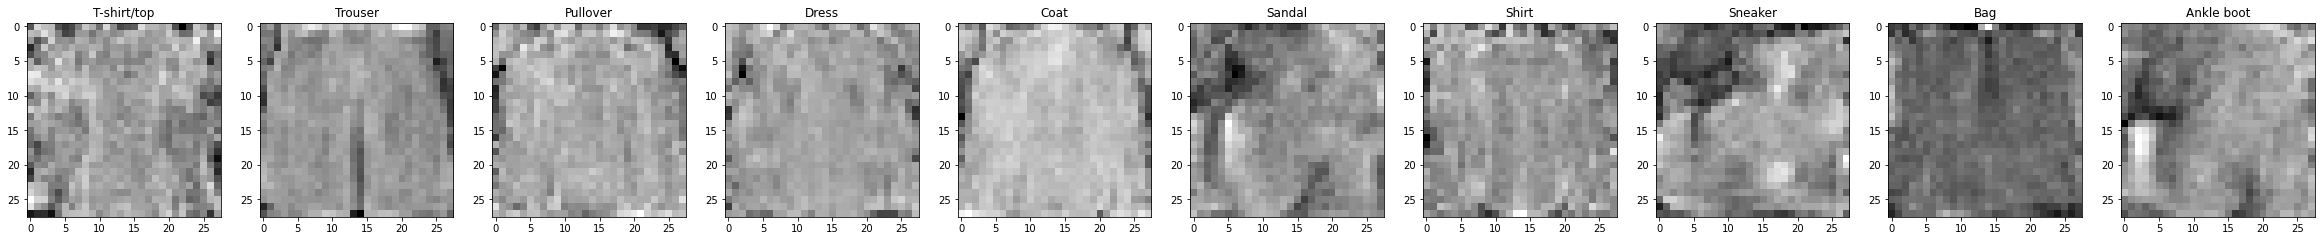

In [ ]:
n = 10
fig, axs = plt.subplots(1, n, figsize=(4.1*n,4))
for i, wi in enumerate(w[:n]):
  axs[i].imshow(wi, cmap='gray')
  axs[i].set_title(class_names[i])

## 6. Inspecting gradients

We can also evaluate the gradients of each output with respect to an input:

In [ ]:
idx = 112
inp_v = x_train[idx:idx+1]  # use some image to compute gradients with respect to

inp = tf.constant(inp_v)  # create tf constant tensor
with tf.GradientTape() as tape:  # gradient tape for gradint evaluation
  tape.watch(inp)  # take inp as variable
  preds = model(inp) # evaluate model output

grads = tape.jacobian(preds, inp)  # evaluate d preds[i] / d inp[j]
print(grads.shape, '<- (Batch_preds, preds[i], Batch_inp, inp[y], inp[x])')
grads = grads.numpy()[0,:,0]

(1, 10, 1, 28, 28) <- (Batch_preds, preds[i], Batch_inp, inp[y], inp[x])


prediction: 6


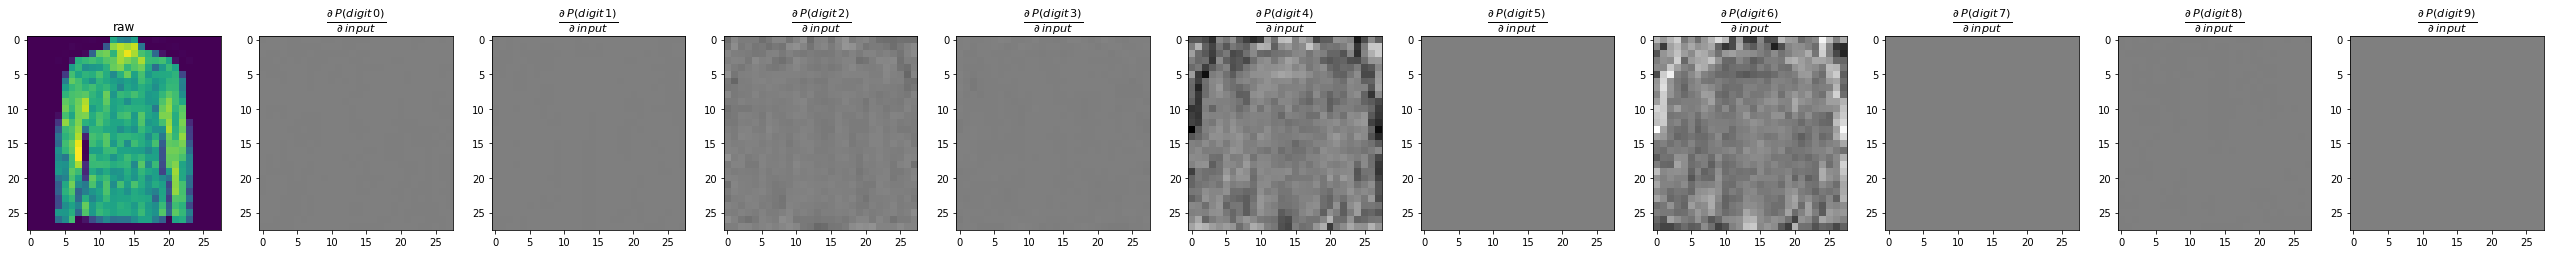

In [ ]:
print('prediction:', np.argmax(preds[0]))
fig, axs = plt.subplots(1, 11, figsize=(4.1*11,4))
axs[0].imshow(inp_v[0])
axs[0].set_title('raw')
vmin,vmax = grads.min(), grads.max()
for i, g in enumerate(grads):
  axs[i+1].imshow(g, cmap='gray', vmin=vmin, vmax=vmax)
  axs[i+1].set_title(r'$\frac{\partial\;P(digit\,%d)}{\partial\;input}$' % i, fontdict={'size':16})

## EXERCISE 1: Train deeper network for F-MNIST classification

Make a deeper model, with wider layers. Remember to `'softmax'` activation in the last layer, as required for the classification task to encode pseudoprobabilities. In the other layers you could use `'relu'`.

Try to achieve 90% accuracy.
Does your model overfit?

In [ ]:
# 1. create model
# 2. train the model
# 3. plot the loss and accuracy evolution during training
# 4. evaluate model in best point (before overfitting)

# 2. Extras and Q&A

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/cheatsheet.png" width="100%"/>

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/clusters.png" width="100%"/>